In [1]:
import pandas as pd
path = "/Users/zeeshanabbasi/Desktop/internship projects/movie_review_sentiment/data/IMDB Dataset.csv"
df = pd.read_csv(path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


review       0
sentiment    0
dtype: int64

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


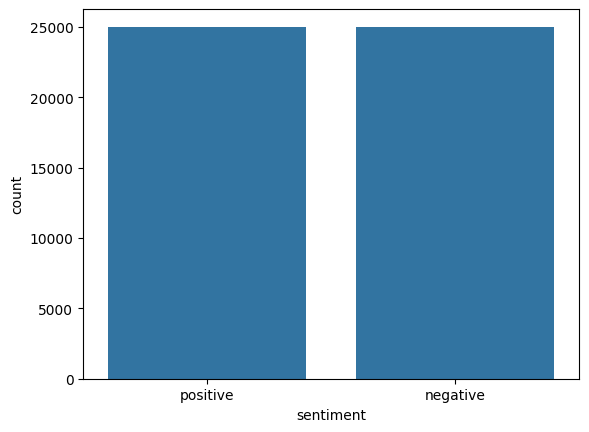

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sns.countplot(x='sentiment', data=df)
plt.show()

In [4]:
df['review_length_chars'] = df['review'].apply(len)
df['review_length_words'] = df['review'].apply(lambda x: len(x.split()))

df[['review_length_chars', 'review_length_words']].describe()

,review_length_chars,review_length_words
count,50000.000000,50000.000000
mean,1309.431020,231.156940
std,989.728014,171.343997
min,32.000000,4.000000
25%,699.000000,126.000000
50%,970.000000,173.000000
75%,1590.250000,280.000000
max,13704.000000,2470.000000


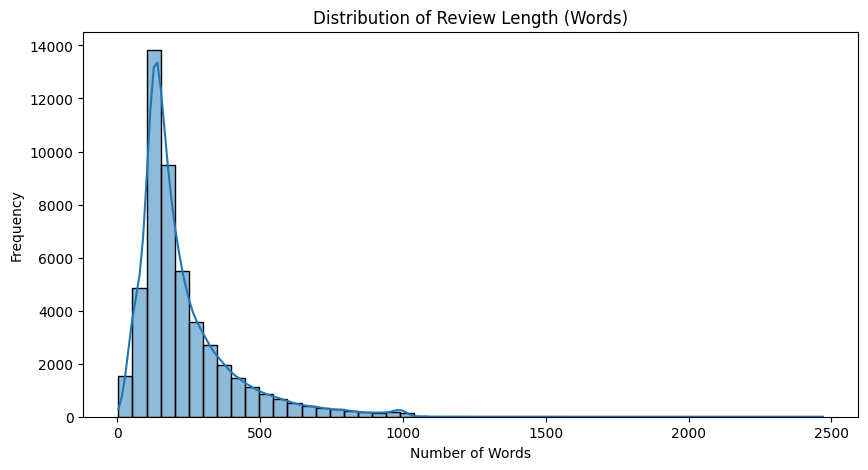

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['review_length_words'], bins=50, kde=True)
plt.title('Distribution of Review Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

df['review_length_words'] = df['review'].apply(lambda x: len(x.split()))

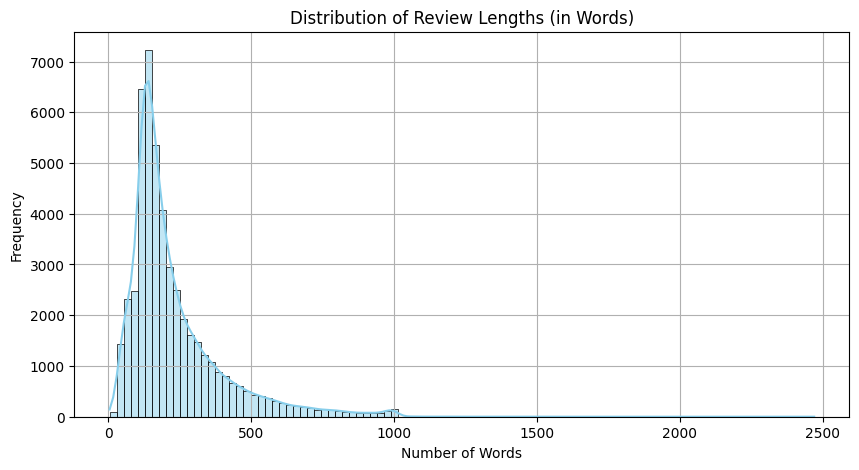

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length_words'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/03/f_3hssr15d79dbq0j2wfkkn80000gn/T/ipykernel_83439/3109932421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='review_length_words', palette='pastel')


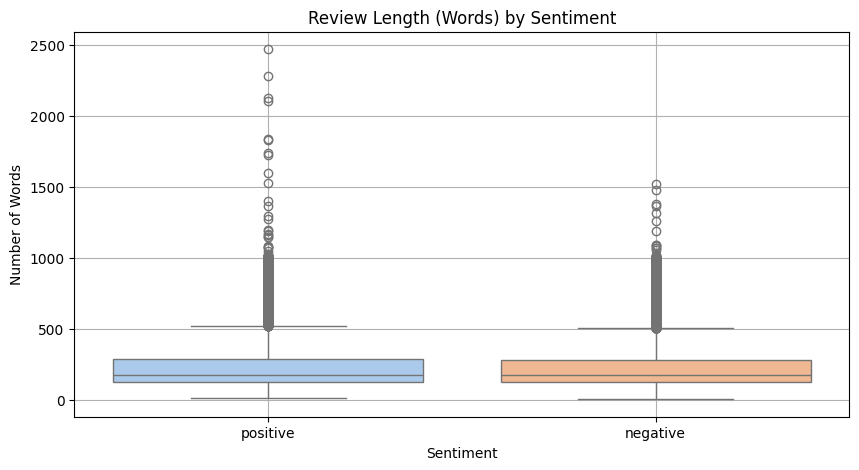

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='sentiment', y='review_length_words', palette='pastel')
plt.title('Review Length (Words) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.grid(True)
plt.show()

In [9]:
html_tag_count = df['review'].str.contains('<.*?>').sum()
print(f"Number of reviews with HTML tags: {html_tag_count}")

Number of reviews with HTML tags: 28968


In [10]:
import re

def has_special_chars(text):
    return bool(re.search(r'[^a-zA-Z0-9\s.,!?\'"]', text))

special_char_count = df['review'].apply(has_special_chars).sum()
print(f"Number of reviews with special characters: {special_char_count}")

Number of reviews with special characters: 44635


In [11]:
from collections import Counter

all_reviews = ' '.join(df['review'].tolist())
tokens = re.findall(r'\b\w+\b', all_reviews.lower())
word_freq = Counter(tokens)

word_freq.most_common(20)

[('the', 662910),
 ('and', 322091),
 ('a', 320717),
 ('of', 287338),
 ('to', 266120),
 ('is', 209631),
 ('br', 200425),
 ('it', 189437),
 ('in', 185416),
 ('i', 174140),
 ('this', 149810),
 ('that', 142815),
 ('s', 124159),
 ('was', 94816),
 ('as', 91076),
 ('movie', 87276),
 ('for', 86821),
 ('with', 86717),
 ('but', 82923),
 ('film', 79148)]

In [12]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

positive_tokens = re.findall(r'\b\w+\b', positive_reviews.lower())
negative_tokens = re.findall(r'\b\w+\b', negative_reviews.lower())

Counter(positive_tokens).most_common(15), Counter(negative_tokens).most_common(15)

([('the', 340080),
  ('and', 176022),
  ('a', 163762),
  ('of', 151585),
  ('to', 130887),
  ('is', 111480),
  ('in', 98945),
  ('br', 97602),
  ('it', 94765),
  ('i', 81600),
  ('this', 69365),
  ('that', 69304),
  ('s', 64474),
  ('as', 50934),
  ('with', 45572)],
 [('the', 322830),
  ('a', 156955),
  ('and', 146069),
  ('of', 135753),
  ('to', 135233),
  ('br', 102823),
  ('is', 98151),
  ('it', 94672),
  ('i', 92540),
  ('in', 86471),
  ('this', 80445),
  ('that', 73511),
  ('s', 59685),
  ('was', 51713),
  ('movie', 49616)])

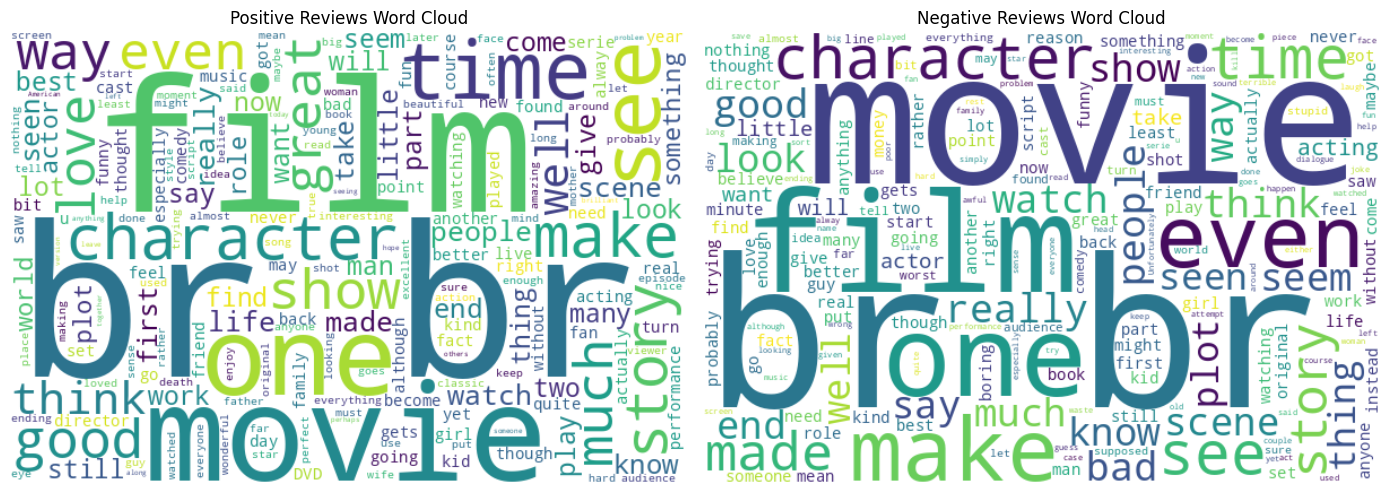

In [13]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['review'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.tight_layout()
plt.show()

In [14]:
from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(remove_html).apply(remove_special_chars).apply(remove_extra_spaces)

/var/folders/03/f_3hssr15d79dbq0j2wfkkn80000gn/T/ipykernel_83439/3239849127.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['tokens'] = df['review'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['cleaned_review'] = df['tokens'].apply(lambda x: ' '.join(x))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.8768780881314914
F1 Score: 0.8782044887780549

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4939
           1       0.87      0.88      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

Logistic Regression Performance:
Accuracy: 0.8832
F1 Score: 0.8853


In [21]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naive Bayes Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

Naive Bayes Performance:
Accuracy: 0.8506
F1 Score: 0.8519


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))

Random Forest Performance:
Accuracy: 0.8337
F1 Score: 0.8339


In [23]:
import joblib

#joblib.dump(svm_model, 'svm_model.pkl')

#joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

In [28]:
svm_model = joblib.load("/Users/zeeshanabbasi/Desktop/internship projects/movie_review_sentiment/models/svm_model.pkl")
tfidf_vectorizer = joblib.load("/Users/zeeshanabbasi/Desktop/internship projects/movie_review_sentiment/models/tfidf_vectorizer.pkl")

In [29]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


user_review = input("Enter a movie review: ")
processed_review = preprocess_text(user_review)
vectorized_review = tfidf_vectorizer.transform([processed_review])
prediction = svm_model.predict(vectorized_review)
print("Predicted Sentiment:", le.inverse_transform(prediction)[0])

Enter a movie review:  good movie


Predicted Sentiment: positive


Confusion Matrix:
 [[4294  645]
 [ 576 4402]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4939
           1       0.87      0.88      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



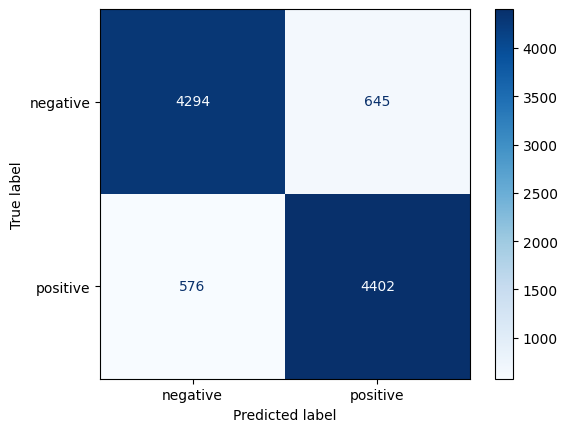

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")

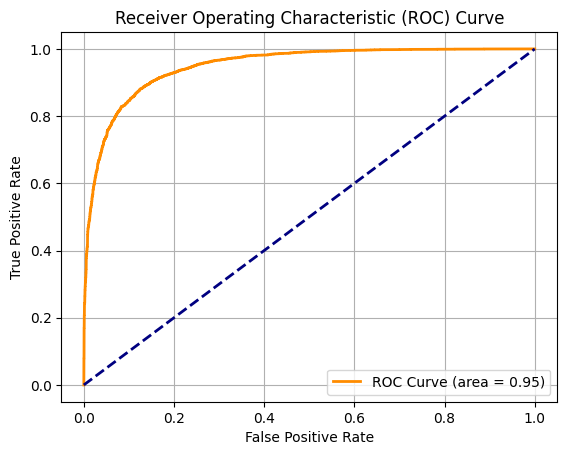

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = svm_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()